# G3Py: Generalized Graphical Gaussian Processes in Python

## Imports and Sunspots Dataset

/home/felipe/anaconda3/envs/env5/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 30 (9.70873786407767%)


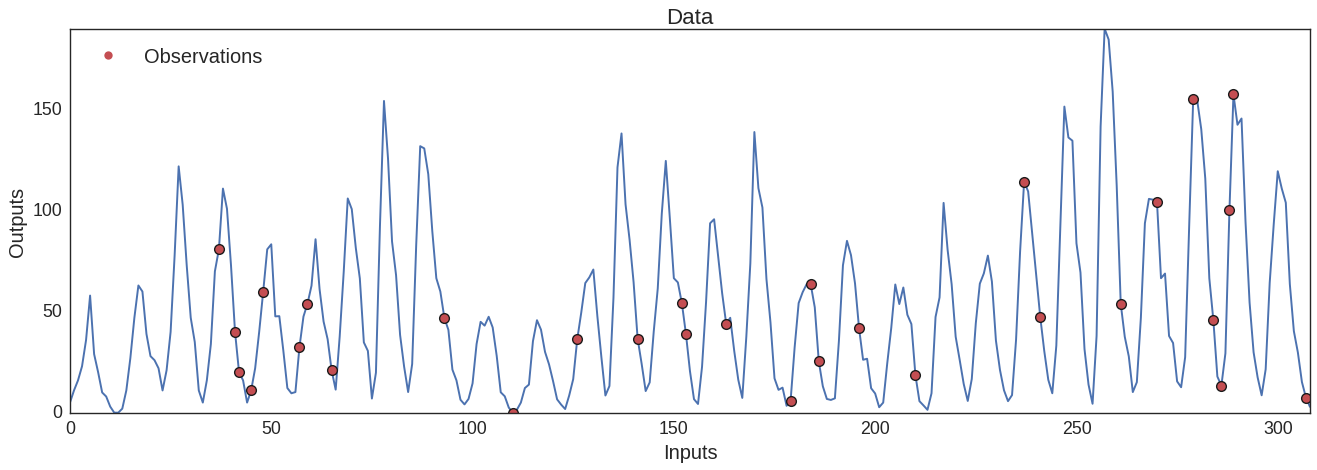

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import pymc3 as pm
import theano as th
import theano.tensor as tt

g3.style_normal()
g3.style_widget()

psamples = 0.1
data = 'subspots'


if data == 'subspots':
    x, y = g3.data_sunspots()
else:
    x, y = g3.data_heart()


obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, psamples)#, plot=True, plot_independent = True)

## Define Prior Distribution

In [2]:
gp.plot?

Object `gp.plot` not found.


In [4]:
gp.params

NameError: name 'gp' is not defined

In [ ]:
type(gp.inputs)

In [ ]:
gp.inputs

In [ ]:
type(gp.outputs)

In [ ]:
type(gp.std)

In [ ]:
gp.mean

In [ ]:
gp.median()

In [34]:
gp.predict(mean=True, std=False, median=True, quantiles_noise=False, distribution = True)

{'logpredictive': <function g3py.processes.stochastic.StochasticProcess.predict.<locals>.<lambda>>,
 'mean': array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
         0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
    

In [ ]:
gp.observed(inputs=x_obs, outputs=y_obs, hidden=y)

In [ ]:
gp.plot(samples=10, prior=True)

In [ ]:
gp.plot(samples=10, prior=False)

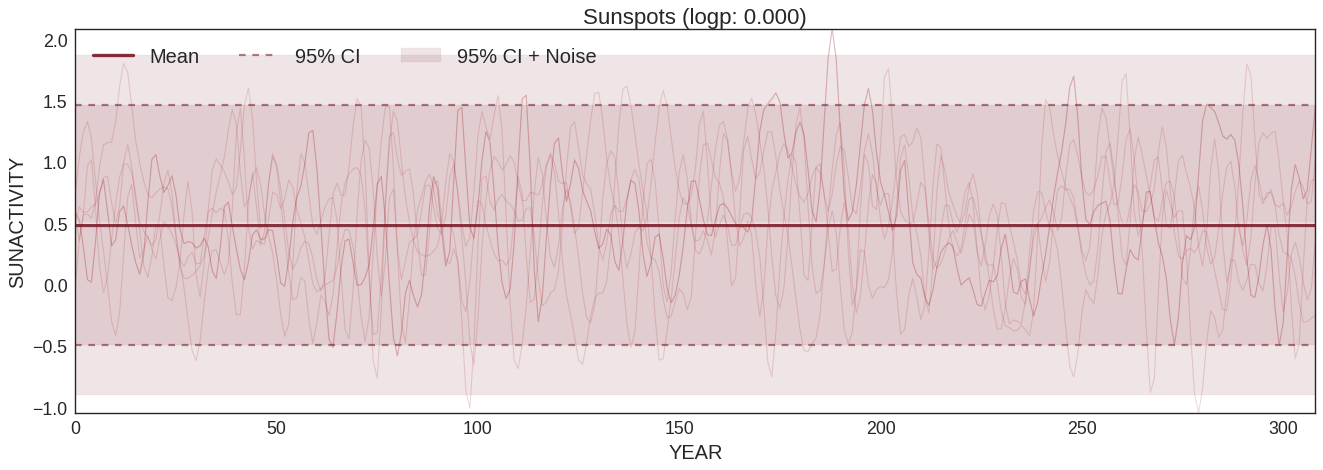

{'GP_Bias_Bias': 0.5,
 'GP_Noise_var_log_': array(-1.3862943649291992, dtype=float32),
 'GP_SE_rate_log_': array([-0.69314718], dtype=float32),
 'GP_SE_var_log_': array(-1.3862943649291992, dtype=float32)}
array(0.0, dtype=float32)


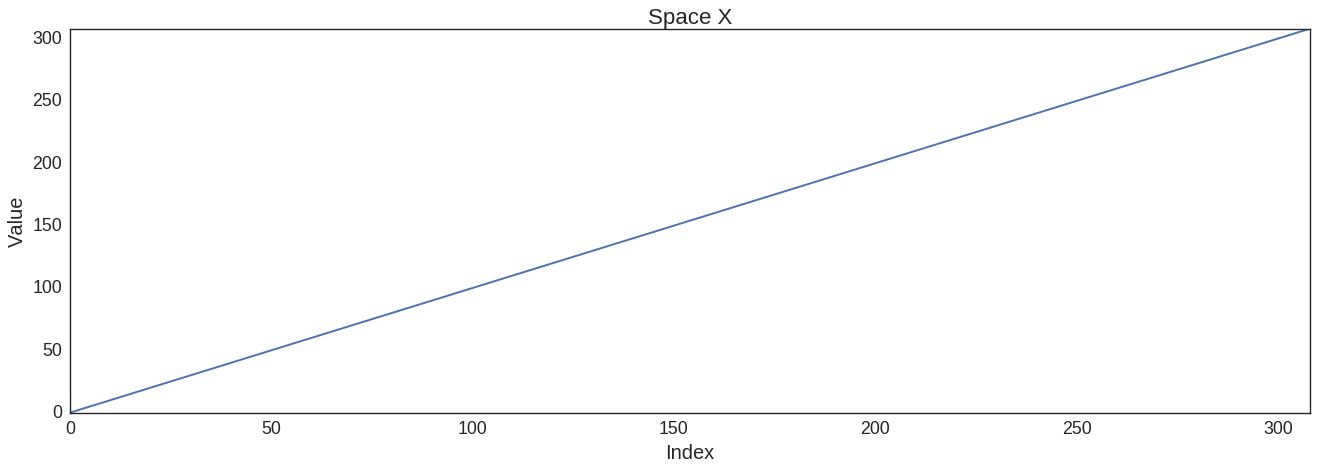

In [2]:
gp = g3.GaussianProcess(space=x, location=g3.Bias(), kernel=g3.SE(), noisy=True)
gp.describe('Sunspots', 'YEAR', 'SUNACTIVITY')
gp.plot(samples=5, plot_space = True)
g3.print(gp.params, gp.logp(gp.params))

{'GP_Bias_Bias': 0.5,
 'GP_Noise_var_log__': array(-1.3862943649291992, dtype=float32),
 'GP_SE_rate_log__': array([-0.69314718], dtype=float32),
 'GP_SE_var_log__': array(-1.3862943649291992, dtype=float32)}
array(0.0, dtype=float32)


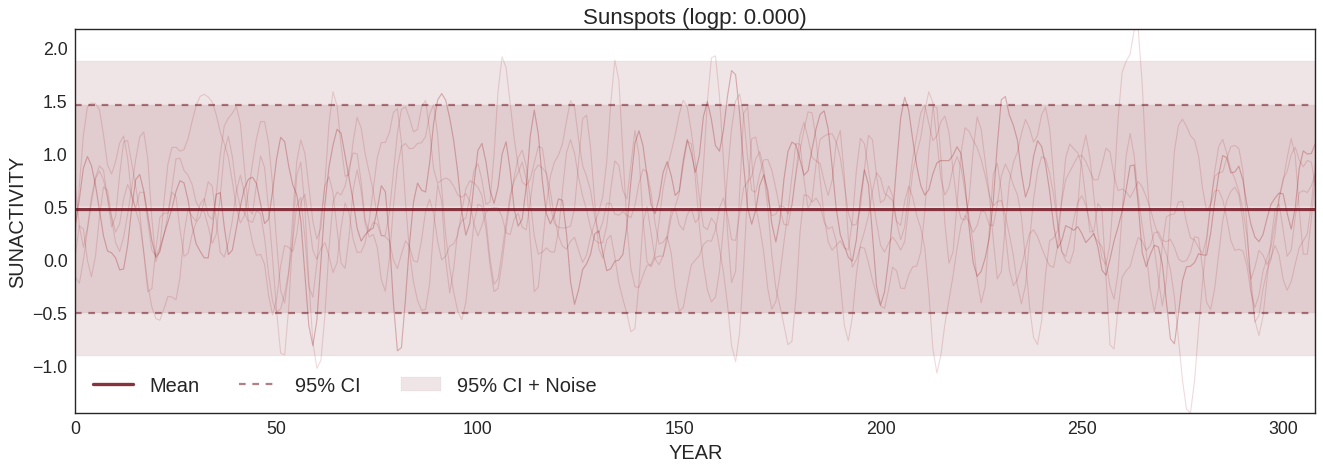

In [3]:
gp = g3.GaussianProcess(space=x, location=g3.Bias(), kernel=g3.SE(), noisy=True)
gp.describe('Sunspots', 'YEAR', 'SUNACTIVITY')
gp.plot(samples=5)#, hidden = True)
g3.print(gp.params, gp.logp(gp.params))

In [11]:
gp.params

{'GP_Bias_Bias': 0.5,
 'GP_Noise_var_log__': array(-1.3862943649291992, dtype=float32),
 'GP_SE_rate_log__': array([-0.69314718], dtype=float32),
 'GP_SE_var_log__': array(-1.3862943649291992, dtype=float32)}

In [12]:
gp.params_default

{'GP_Bias_Bias': 0.5,
 'GP_Noise_var_log__': array(-1.3862943649291992, dtype=float32),
 'GP_SE_rate_log__': array([-0.69314718], dtype=float32),
 'GP_SE_var_log__': array(-1.3862943649291992, dtype=float32)}

In [13]:
gp.params_test

{'GP_Bias_Bias': array(0.0, dtype=float32),
 'GP_Noise_var_log__': array(0.0, dtype=float32),
 'GP_SE_rate_log__': array([ 0.], dtype=float32),
 'GP_SE_var_log__': array(0.0, dtype=float32)}

In [19]:
gp.params_random()

{'GP_Bias_Bias': 0.50055629,
 'GP_Noise_var_log__': -1.2613819,
 'GP_SE_rate_log__': array([-0.75596452], dtype=float32),
 'GP_SE_var_log__': -1.6442403}

In [32]:
gp.set_params()

In [24]:
gp.params

{'GP_Bias_Bias': 0.5,
 'GP_Noise_var_log__': array(-1.3862943649291992, dtype=float32),
 'GP_SE_rate_log__': array([-0.69314718], dtype=float32),
 'GP_SE_var_log__': array(-1.3862943649291992, dtype=float32)}

In [25]:
gp.observed(inputs=x_obs, outputs=y_obs, hidden=y)

In [33]:
gp.params

{'GP_Bias_Bias': 46.599995,
 'GP_Noise_var_log__': array(7.664357662200928, dtype=float32),
 'GP_SE_rate_log__': array([-3.02963376], dtype=float32),
 'GP_SE_var_log__': array(7.664357662200928, dtype=float32)}

In [46]:
gp.active.current_params

{'GP_Bias_Bias': array(0.0, dtype=float32),
 'GP_Noise_var_log__': array(0.0, dtype=float32),
 'GP_SE_rate_log__': array([ 0.], dtype=float32),
 'GP_SE_var_log__': array(0.0, dtype=float32)}

In [43]:
gp.active.set_params(gp.params_test)

In [39]:
gp.active

In [30]:
gp.params_default

{'GP_Bias_Bias': 46.599995,
 'GP_Noise_var_log__': array(7.664357662200928, dtype=float32),
 'GP_SE_rate_log__': array([-3.02963376], dtype=float32),
 'GP_SE_var_log__': array(7.664357662200928, dtype=float32)}

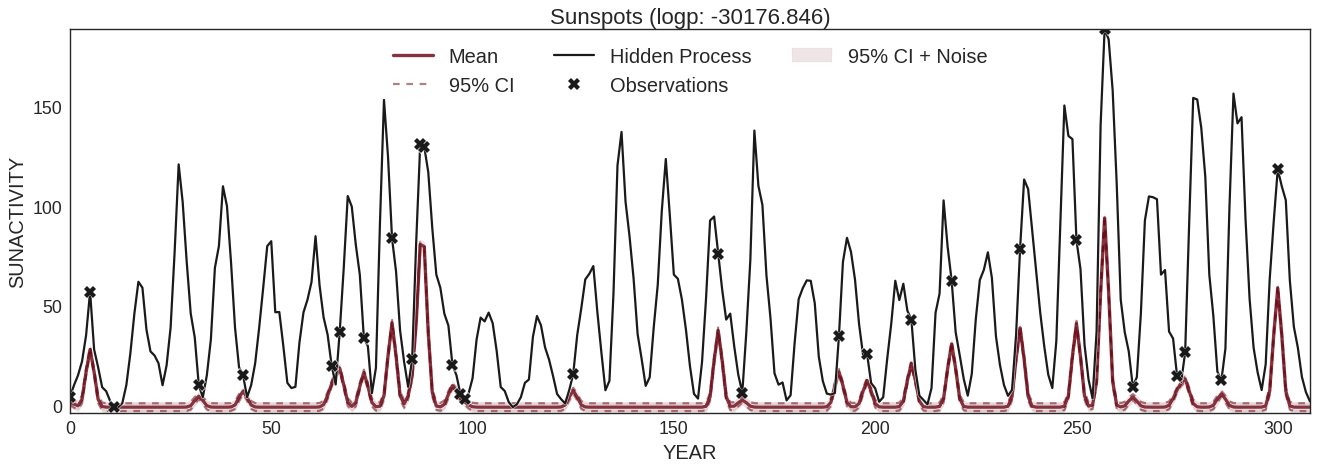

In [38]:
gp.plot(gp.params_test)

In [36]:
gp.params

{'GP_Bias_Bias': 46.599995,
 'GP_Noise_var_log__': array(7.664357662200928, dtype=float32),
 'GP_SE_rate_log__': array([-3.02963376], dtype=float32),
 'GP_SE_var_log__': array(7.664357662200928, dtype=float32)}

In [32]:
gp.predict

<bound method StochasticProcess.predict of <g3py.processes.gaussian.GaussianProcess object at 0x7f2710d73898>>

In [3]:
gp.describe?

In [8]:
g3.GaussianProcess?

In [9]:
np.random.randn?

In [12]:
rand = np.random.randn(10,2)

In [13]:
rand

array([[-0.51154346,  0.29275109],
       [ 2.15562695, -1.09804261],
       [ 1.19517643, -0.7192259 ],
       [-1.65964963, -2.19739119],
       [-0.16110755,  1.78494946],
       [-0.8258145 ,  0.25763122],
       [-0.8995846 ,  0.9714994 ],
       [-0.13208578,  0.35584525],
       [-0.43576192,  0.34588884],
       [ 0.30950213,  0.29425126]])

## Default Posterior Distribution, given observations (automatic parameters)

In [38]:
gp.observed?

In [7]:
type(gp.index)

numpy.ndarray

{'GP_Bias_Bias': 51.063332,
 'GP_Noise_var_log_': array(7.357851982116699, dtype=float32),
 'GP_SE_rate_log_': array([-2.92427325], dtype=float32),
 'GP_SE_var_log_': array(7.357851982116699, dtype=float32)}
array(-154.9392852783203, dtype=float32)
{'_l1': 31.681584577344381, '_l2': 1506.8795247883972}


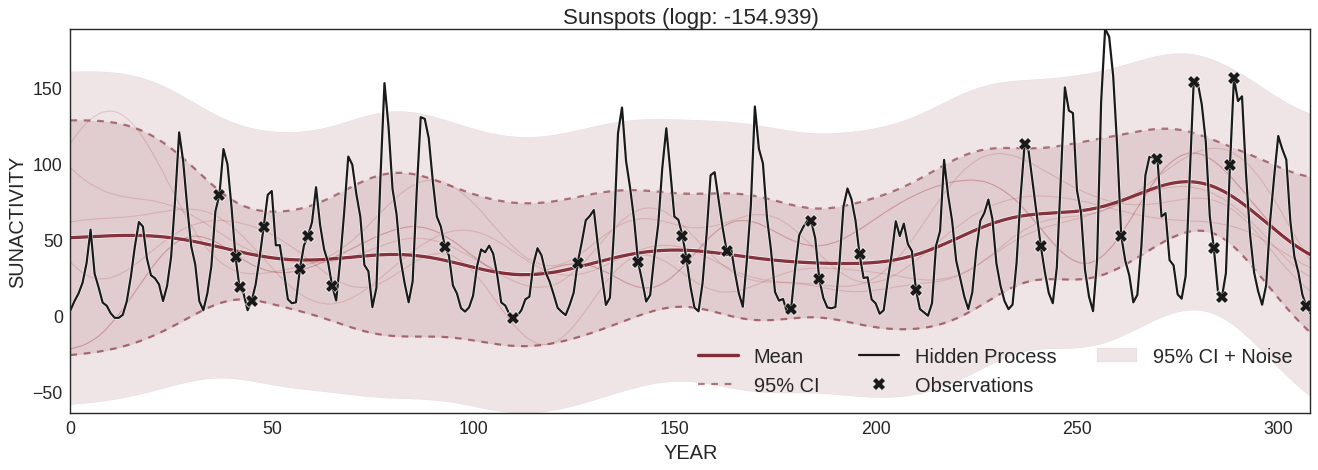

In [3]:
gp.observed(inputs=x_obs, outputs=y_obs, hidden=y)
gp.plot(samples=5)
g3.print(gp.params, gp.logp(gp.params), gp.scores(gp.params))

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

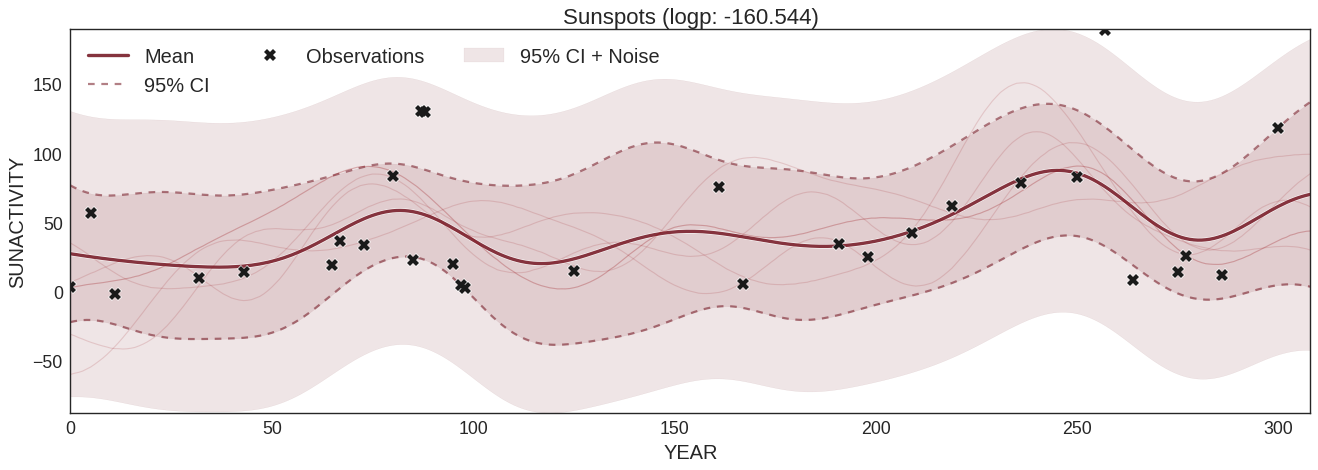

In [8]:
gp.observed(inputs=x_obs, outputs=y_obs)
gp.plot(samples=5)
g3.print(gp.params, gp.logp(gp.params), gp.scores(gp.params))

## Manual Search of parameters

In [53]:
gp.model

In [54]:
gp.widget(samples=5, auto = True)

Widget Javascript not detected.  It may not be installed or enabled properly.


## Change style and get widget params

In [57]:
g3.style_big_seaborn?

{'GP_Bias_Bias': array(-0.05000000074505806, dtype=float32),
 'GP_Noise_var': array([ 252.14396667], dtype=float32),
 'GP_Noise_var_log__': array(5.53000020980835, dtype=float32),
 'GP_SE_rate': array([ 6.88950968], dtype=float32),
 'GP_SE_rate_log__': array([ 1.92999995], dtype=float32),
 'GP_SE_var': array([ 0.60049558], dtype=float32),
 'GP_SE_var_log__': array(-0.5099999904632568, dtype=float32),
 '_l1': 49.791342809421387,
 '_l2': 4109.3813809460598,
 '_ll': array(-366.1824035644531, dtype=float32)}

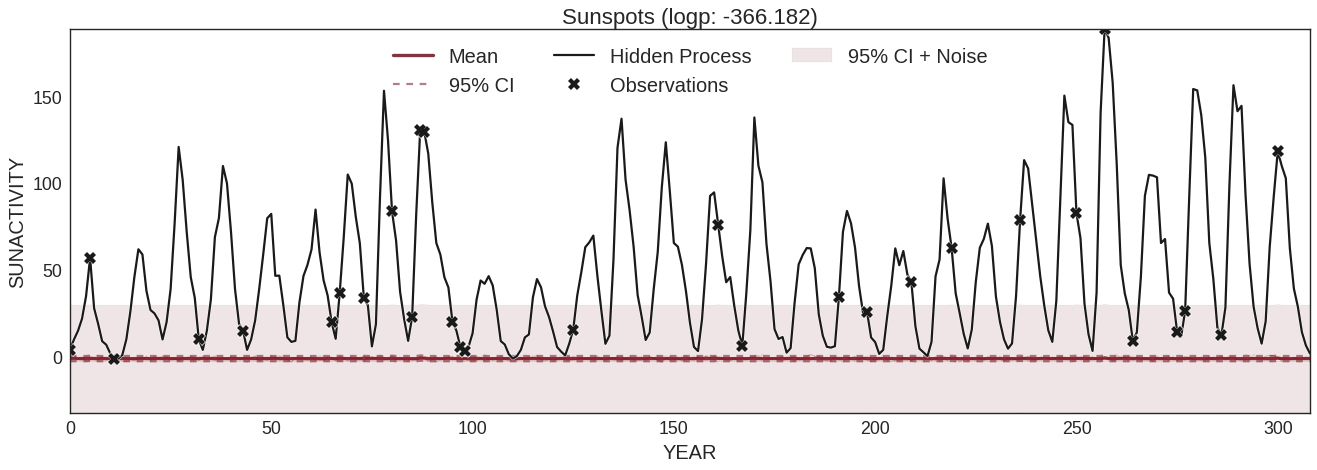

In [58]:
g3.style_normal()
gp.plot(gp.params_widget, samples=5)
gp.eval_params(gp.params_widget)

In [60]:
gp.eval_params?

In [62]:
type(gp.params_widget)

g3py.libs.DictObj

In [67]:
gp.params_default


{'GP_Bias_Bias': 46.599995,
 'GP_Noise_var_log__': array(7.664357662200928, dtype=float32),
 'GP_SE_rate_log__': array([-3.02963376], dtype=float32),
 'GP_SE_var_log__': array(7.664357662200928, dtype=float32)}

In [66]:
gp.params_widget

{'GP_Bias_Bias': array(-0.05000000074505806, dtype=float32),
 'GP_Noise_var_log__': array(5.53000020980835, dtype=float32),
 'GP_SE_rate_log__': array([ 1.92999995], dtype=float32),
 'GP_SE_var_log__': array(-0.5099999904632568, dtype=float32)}

{'GP_Bias_Bias': array(0.0, dtype=float32),
 'GP_Noise_var': array([ 1.], dtype=float32),
 'GP_Noise_var_log__': array(0.0, dtype=float32),
 'GP_SE_rate': array([ 1.], dtype=float32),
 'GP_SE_rate_log__': array([ 0.], dtype=float32),
 'GP_SE_var': array([ 1.], dtype=float32),
 'GP_SE_var_log__': array(0.0, dtype=float32),
 '_l1': 44.469737090940349,
 '_l2': 3378.3303570106905,
 '_ll': array(-30176.845703125, dtype=float32)}

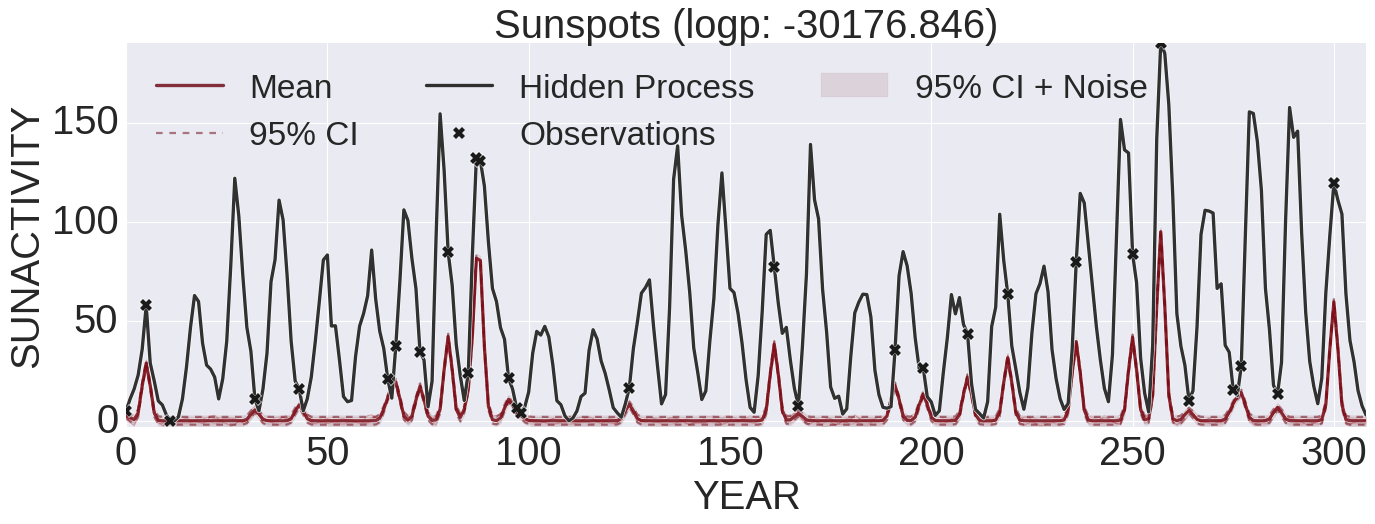

In [70]:
g3.style_big_seaborn()
gp.plot(gp.params, samples=5)
gp.eval_params(params = gp.params)

## Default find_MAP with derivative methods and free-derivative methods

In [74]:
type(gp.params)

g3py.libs.DictObj

In [4]:
params_map = gp.find_MAP(points=200)#, plot = True, display = False)

'Starting function value (-logp): 154.939'
'start_bfgs'
         Current function value: 152.103302
         Iterations: 14
         Function evaluations: 78
         Gradient evaluations: 66
'start_powell'
Optimization terminated successfully.
         Current function value: 152.103378
         Iterations: 3
         Function evaluations: 152
'start_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103287
         Iterations: 1
         Function evaluations: 125
'start_powell_bfgs'
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 75
         Gradient evaluations: 63
'start_bfgs_powell_bfgs'
         Current function value: 152.103287
         Iterations: 0
         Function evaluations: 82
         Gradient evaluations: 70
'start_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 184
'start_bfgs

         Current function value: 152.103287
         Iterations: 0
         Function evaluations: 81
         Gradient evaluations: 69
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 184
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103287
         Iterations: 1
         Function evaluations: 125
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs'
         Current function value: 152.103302
         Iterations: 0
         Function evaluations: 68
         Gradient evaluations: 56
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs

         Current function value: 152.103287
         Iterations: 0
         Function evaluations: 82
         Gradient evaluations: 70
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 184
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103287
         Iterations: 1
         Function evaluations: 106
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_pow

         Current function value: 152.103287
         Iterations: 0
         Function evaluations: 82
         Gradient evaluations: 70
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 184
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103287
         Iterations: 1
         Function evaluations: 119
'start_powell_bfgs_pow

         Current function value: 152.103302
         Iterations: 0
         Function evaluations: 68
         Gradient evaluations: 56
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs'
         Current function value: 152.103287
         Iterations: 0
         Function evaluations: 71
         Gradient evaluations: 59
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current

         Current function value: 152.103287
         Iterations: 0
         Function evaluations: 79
         Gradient evaluations: 67
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 184
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_po

         Current function value: 152.103302
         Iterations: 0
         Function evaluations: 68
         Gradient evaluations: 56
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs'
         Current function value: 152.103287
         Iterations: 0
         Function evaluations: 74
         Gradient evaluations: 62
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_po

Optimization terminated successfully.
         Current function value: 152.103287
         Iterations: 1
         Function evaluations: 155
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs'
         Current function value: 152.103302
         Iterations: 0
         Function evaluations: 68
         Gradient evaluations: 56
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bf

Optimization terminated successfully.
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 184
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103287
         Iterations: 1
         Function evaluations: 155
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bf

Optimization terminated successfully.
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 184
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103287
         Iterations: 1
         Function evaluations: 155
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bf

Optimization terminated successfully.
         Current function value: 152.103302
         Iterations: 1
         Function evaluations: 184
'start_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell'
Optimization terminated successfully.
         Current function value: 152.103287
         Iterations: 1
         Function evaluations: 155
'start_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bfgs_powell_bf

In [72]:
gp.find_MAP?

{'GP_Bias_Bias': array(50.49007797241211, dtype=float32),
 'GP_Noise_var': array([ 1321.04040527], dtype=float32),
 'GP_Noise_var_log_': array(7.1861748695373535, dtype=float32),
 'GP_SE_rate': array([ 0.02366602], dtype=float32),
 'GP_SE_rate_log_': array([-3.74371481], dtype=float32),
 'GP_SE_var': array([ 233.71290588], dtype=float32),
 'GP_SE_var_log_': array(5.4540934562683105, dtype=float32),
 '_l1': 31.904494515823309,
 '_l2': 1531.3097347190844,
 '_ll': array(-152.10328674316406, dtype=float32)}


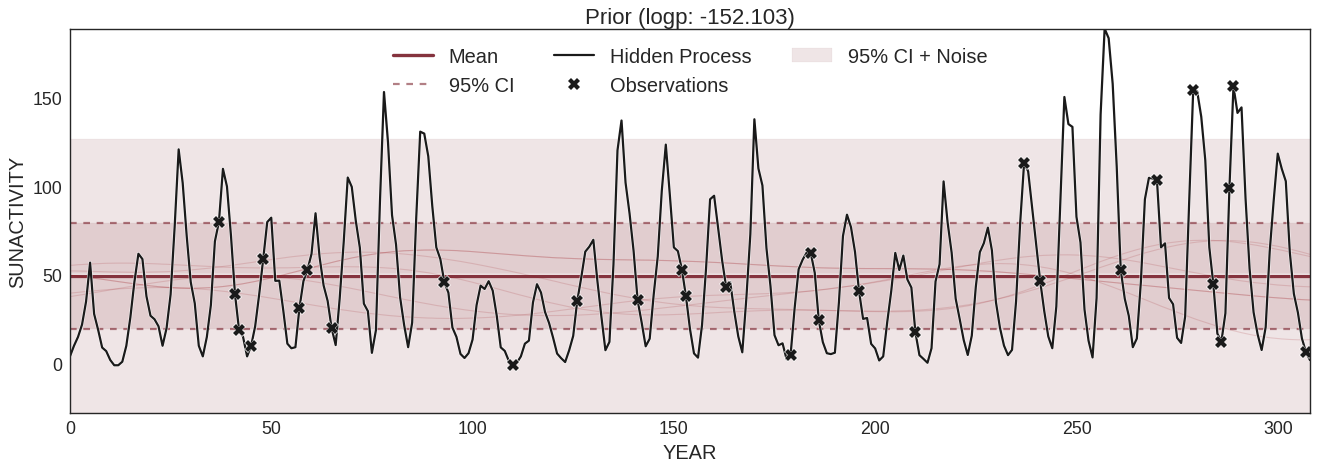

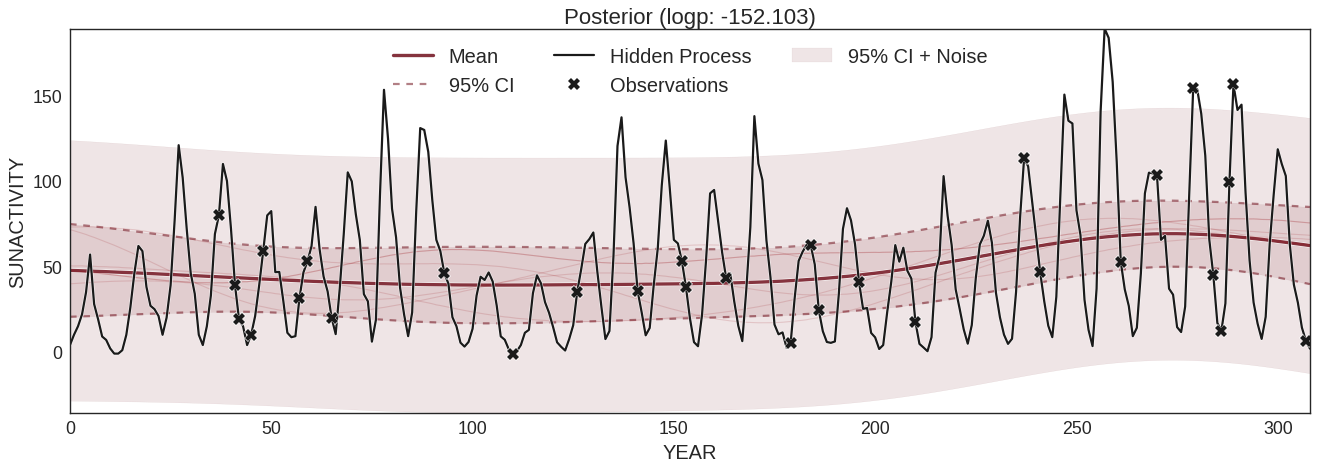

In [6]:
g3.print(gp.eval_params(params_map))
gp.plot(params_map, samples=5, prior=True, title='Prior')
g3.show()
gp.plot(params_map, samples=5, title='Posterior')
g3.show()

## Find MAP from random points

In [86]:
gp.params_default.items()

dict_items([('GP_Bias_Bias', 46.599995), ('GP_SE_var_log__', array(7.664357662200928, dtype=float32)), ('GP_SE_rate_log__', array([-3.02963376], dtype=float32)), ('GP_Noise_var_log__', array(7.664357662200928, dtype=float32))])

In [87]:
for k,v in gp.params_default.items():
    print(k)
    print(v)

GP_Bias_Bias
46.6
GP_SE_var_log__
7.664357662200928
GP_SE_rate_log__
[-3.02963376]
GP_Noise_var_log__
7.664357662200928


In [7]:
type(gp.params_default)

g3py.libs.DictObj

In [83]:
gp.active.params_random?

In [82]:
gp.params_random?

{'GP_Bias_Bias': array(50.50737762451172, dtype=float32),
 'GP_Noise_var': array([ 1321.30114746], dtype=float32),
 'GP_Noise_var_log_': array(7.18637228012085, dtype=float32),
 'GP_SE_rate': array([ 0.02366426], dtype=float32),
 'GP_SE_rate_log_': array([-3.74378943], dtype=float32),
 'GP_SE_var': array([ 234.06710815], dtype=float32),
 'GP_SE_var_log_': array(5.455607891082764, dtype=float32),
 '_l1': 31.905756834949873,
 '_l2': 1531.3379726997866,
 '_ll': array(-152.10328674316406, dtype=float32)}


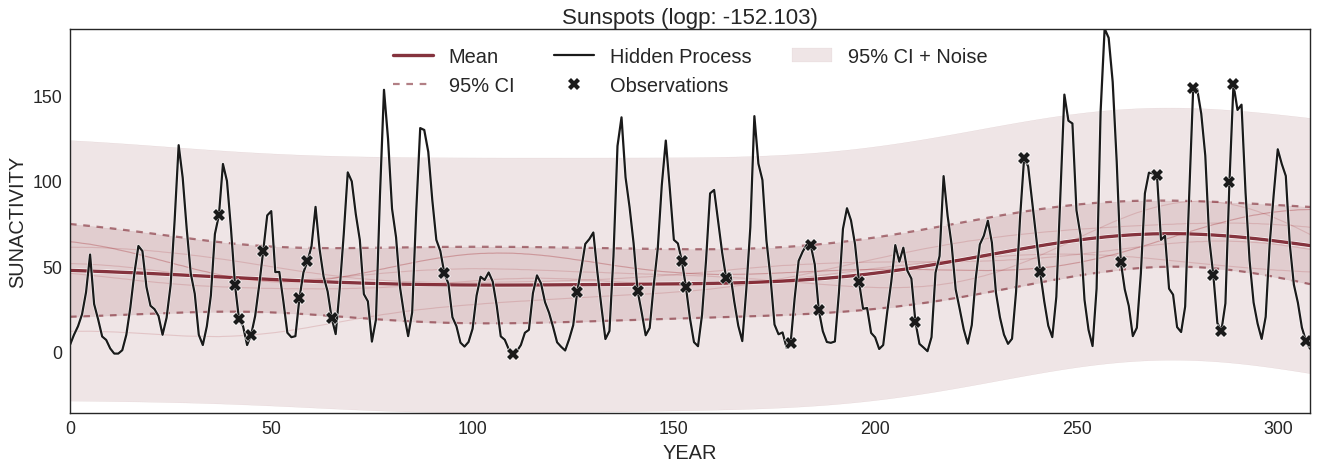

{'GP_Bias_Bias': array(50.518917083740234, dtype=float32),
 'GP_Noise_var': array([ 1322.00134277], dtype=float32),
 'GP_Noise_var_log_': array(7.186902046203613, dtype=float32),
 'GP_SE_rate': array([ 0.02367149], dtype=float32),
 'GP_SE_rate_log_': array([-3.74348378], dtype=float32),
 'GP_SE_var': array([ 233.64549255], dtype=float32),
 'GP_SE_var_log_': array(5.453804969787598, dtype=float32),
 '_l1': 31.90629949724018,
 '_l2': 1531.3279298768327,
 '_ll': array(-152.10330200195312, dtype=float32)}


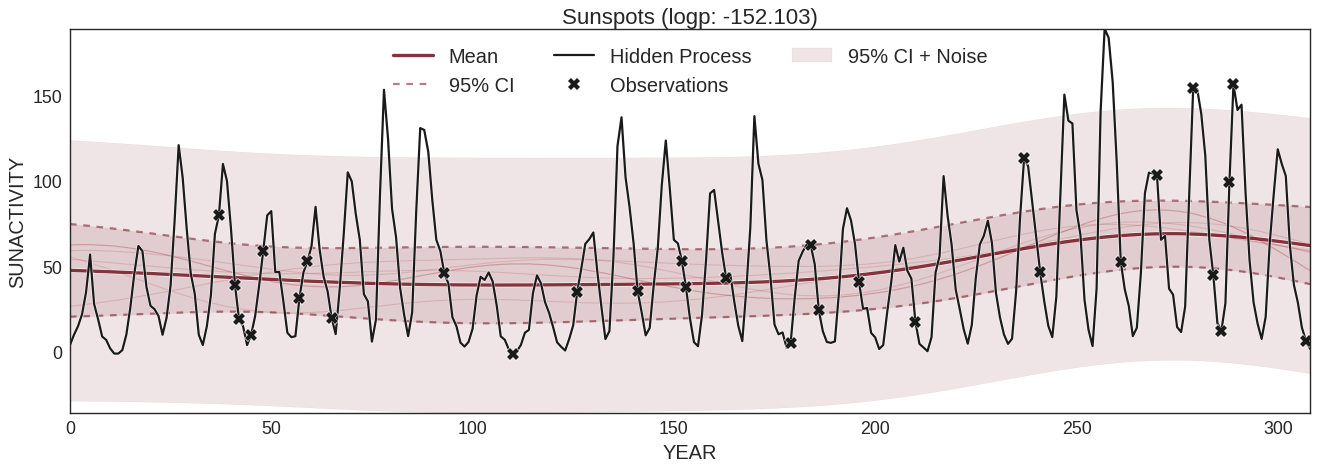

{'GP_Bias_Bias': array(50.526493072509766, dtype=float32),
 'GP_Noise_var': array([ 1320.98120117], dtype=float32),
 'GP_Noise_var_log_': array(7.186130046844482, dtype=float32),
 'GP_SE_rate': array([ 0.02365997], dtype=float32),
 'GP_SE_rate_log_': array([-3.74397063], dtype=float32),
 'GP_SE_var': array([ 234.31201172], dtype=float32),
 'GP_SE_var_log_': array(5.456653594970703, dtype=float32),
 '_l1': 31.907159989242796,
 '_l2': 1531.3738488400008,
 '_ll': array(-152.10328674316406, dtype=float32)}


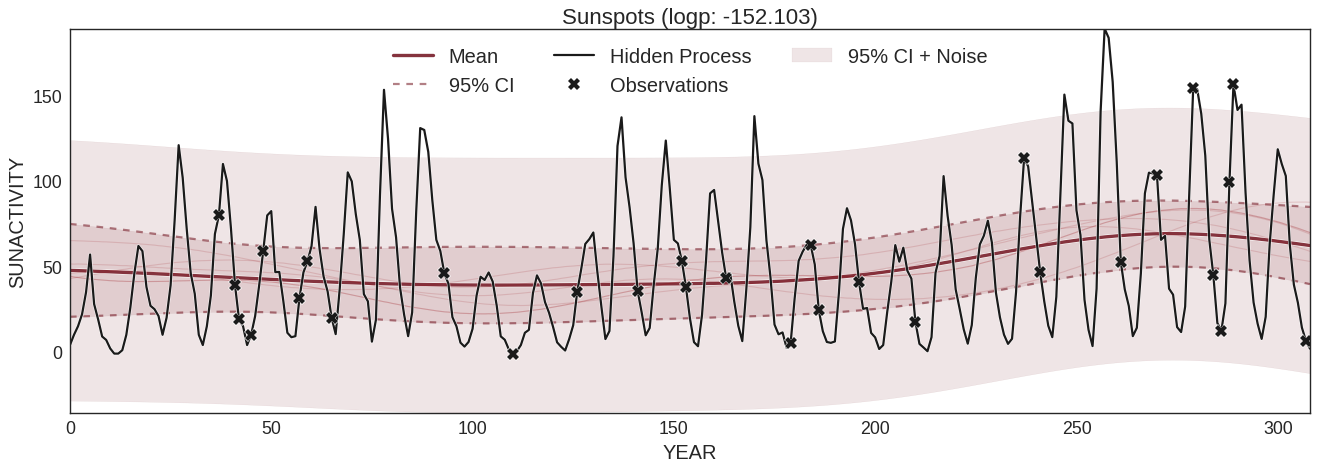

{'GP_Bias_Bias': array(50.524375915527344, dtype=float32),
 'GP_Noise_var': array([ 1321.80407715], dtype=float32),
 'GP_Noise_var_log_': array(7.186752796173096, dtype=float32),
 'GP_SE_rate': array([ 0.02359616], dtype=float32),
 'GP_SE_rate_log_': array([-3.74667144], dtype=float32),
 'GP_SE_var': array([ 233.52296448], dtype=float32),
 'GP_SE_var_log_': array(5.453280448913574, dtype=float32),
 '_l1': 31.90731882385451,
 '_l2': 1531.4956670092245,
 '_ll': array(-152.10330200195312, dtype=float32)}


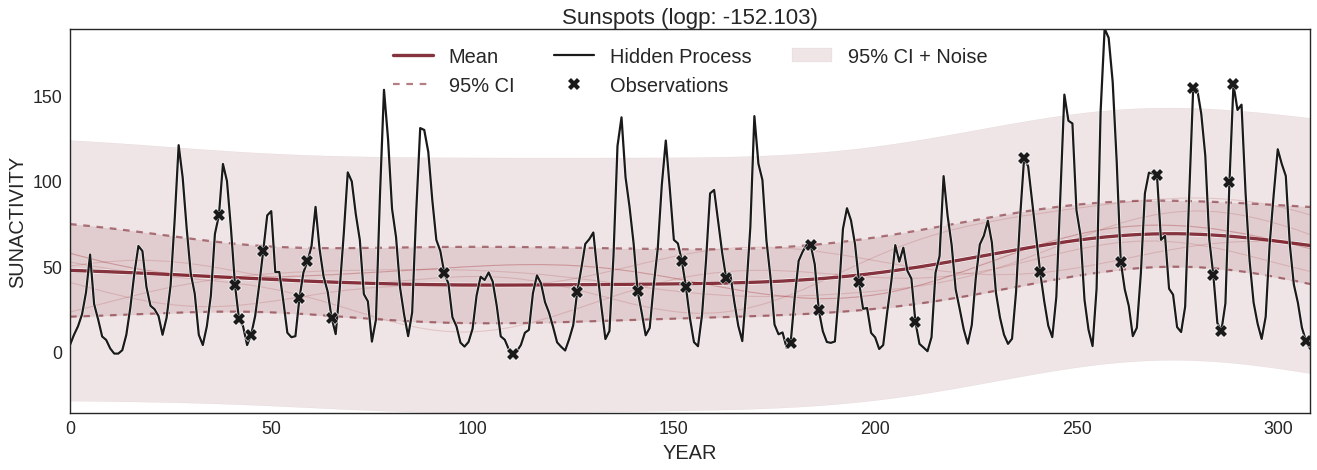

{'GP_Bias_Bias': array(50.51255416870117, dtype=float32),
 'GP_Noise_var': array([ 1321.2980957], dtype=float32),
 'GP_Noise_var_log_': array(7.186369895935059, dtype=float32),
 'GP_SE_rate': array([ 0.02365511], dtype=float32),
 'GP_SE_rate_log_': array([-3.74417615], dtype=float32),
 'GP_SE_var': array([ 234.00149536], dtype=float32),
 'GP_SE_var_log_': array(5.45532751083374, dtype=float32),
 '_l1': 31.906166155670064,
 '_l2': 1531.3627947790185,
 '_ll': array(-152.10328674316406, dtype=float32)}


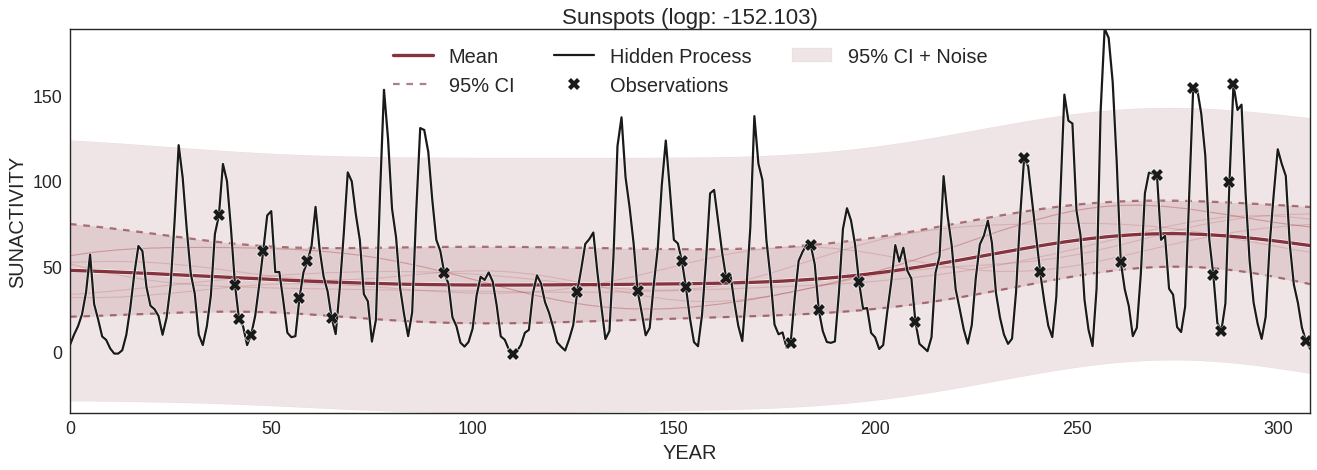

In [7]:
for k in range(5):
    init_params = gp.params_random(gp.params_widget, sigma=0.2)
    params = gp.find_MAP(init_params, points=2, display=False)
    g3.print(gp.eval_params(params))
    gp.plot(params, samples=5)
    g3.show()

## Get prediction and custom plot

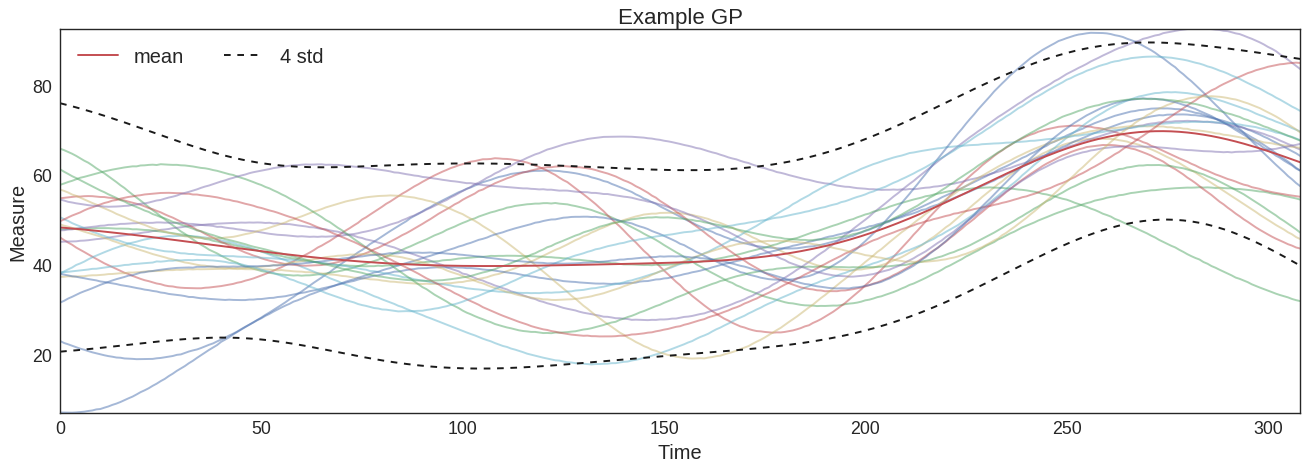

In [8]:
prediction = gp.predict(params, samples=20)
mu, std, samples = prediction.mean, prediction.std, prediction.samples
g3.plot(samples, alpha=0.5)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*std, '--k', label='4 std')
g3.plot(mu - 2*std, '--k')
g3.plot_text('Example GP', 'Time', 'Measure')
g3.plot_save('images/gp_sunspots3.pdf')

# Sampling Hyperparameters with Ensemble MCMC

In [13]:
type(gp.params_default)

g3py.libs.DictObj

In [11]:
gp.sample_hypers?

Sampling 4 variables, 10 chains, 100 times (None temps)


100%|██████████| 100/100 [00:00<00:00, 164.06it/s]


GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  GP_Bias_Bias  \
0             7.100766           -3.391284        5.211396     49.879865   
1             7.100766           -3.391284        5.211396     49.879865   
2             7.222480           -3.250954        5.432191     51.474583   
3             7.222480           -3.250954        5.432191     51.474583   
4             7.530727           -2.898807        5.992481     55.491926   
5             7.821456           -2.604555        6.533946     59.031629   
6             7.581324           -2.830791        6.124126     57.657406   
7             7.472807           -1.786242        6.322661     67.191598   
8             7.413515           -1.925741        6.170597     65.588650   
9             7.380026            0.257813        7.561577     61.761998   
10            7.258033           -0.388468        7.014178     58.927841   
11            7.251318           -0.224892        7.114053     58.514684   
12            7.251318           -0.224892        7.114053     58.514684   
13            7.251318           -0.224892        7.114053     58.514684   
14            7.386598            2.616043        6.300755     50.874805   
15            7.538485            4.123953        6.718082     50.406110   
16            7.542049            4.154471        6.728094     50.431073   
17            7.505133            5.050417        6.761585     52.556087   
18            7.505133            5.050417        6.761585     52.556087   
19            7.505133            5.050417        6.761585     52.556087   
20            7.274114            2.027400        6.069628     52.169549   
21            7.274114            2.027400        6.069628     52.169549   
22            7.226058            1.075730        5.955556     50.881566   
23            7.226058            1.075730        5.955556     50.881566   
24            7.186268            5.796185        6.782356     43.606197   
25            7.186268            5.796185        6.782356     43.606197   
26            7.186268            5.796185        6.782356     43.606197   
27            7.042421           13.944220        5.731818     35.421493   
28            7.153549           17.876883        5.711287     30.380240   
29            7.223197           14.762000        5.597357     30.917049   
..                 ...                 ...             ...           ...   
970           6.976028           27.644010       -6.668057     59.171720   
971           6.976028           27.644010       -6.668057     59.171720   
972           6.976028           27.644010       -6.668057     59.171720   
973           6.976028           27.644010       -6.668057     59.171720   
974           7.031301           16.748564       -1.153780     53.452454   
975           7.028864           16.170737       -0.654740     52.750766   
976           6.967522           19.253437       -0.945218     53.700985   
977           7.065757           13.064429        0.772412     51.827535   
978           7.043162           14.487928        0.377350     52.258437   
979           6.979086           17.069370        0.256072     53.216062   
980           6.979086           17.069370        0.256072     53.216062   
981           7.069822           11.071362        1.868878     50.612673   
982           7.069822           11.071362        1.868878     50.612673   
983           7.130609            7.043685        1.472962     50.288857   
984           7.130609            7.043685        1.472962     50.288857   
985           7.134041            6.824177        1.450006     50.269238   
986           6.943554           10.958661        2.993555     51.020634   
987           6.943554           10.958661        2.993555     51.020634   
988           6.706748           17.588973        6.397723     51.893698   
989           6.706748           17.588973        6.397723     51.893698   
990           6.706748           17.588973        6.3

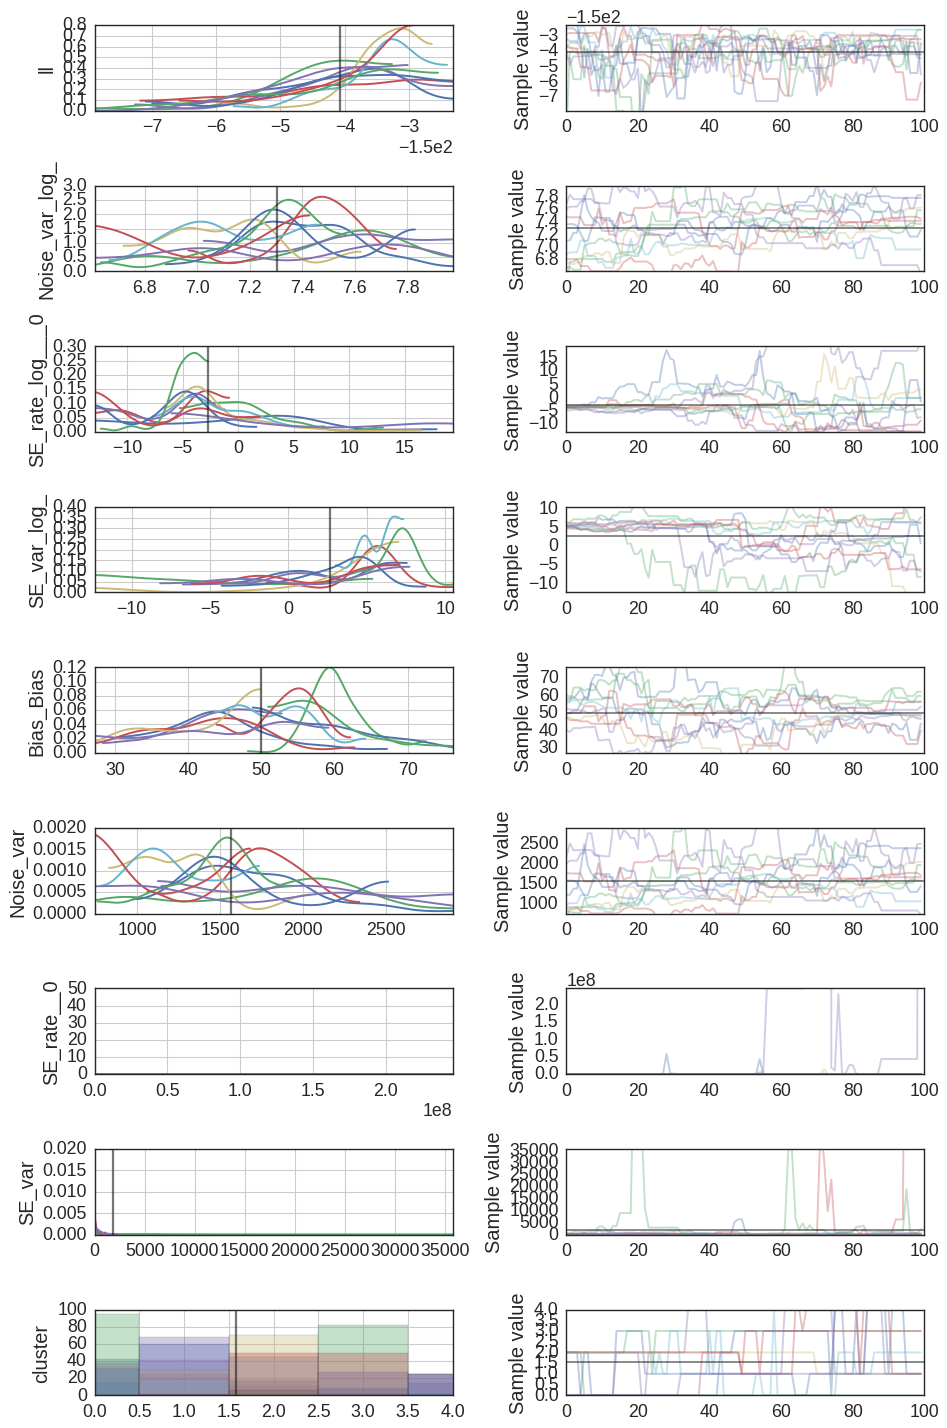

In [17]:
datatrace = gp.sample_hypers(start=params, samples=100, chains=10, plot = True)
datatrace

In [18]:
dat, dati = gp.sample_hypers(start=params, samples=100, chains=10, raw = True)


Sampling 4 variables, 10 chains, 100 times (None temps)


100%|██████████| 100/100 [00:00<00:00, 223.09it/s]


array([[[  7.72381978,  -3.45398619,   5.31647137,  44.82612884],
        [  7.64586059,  -3.40263638,   5.35585268,  46.95027823],
        [  7.53611197,  -3.39116018,   5.37942842,  48.26008428],
        ..., 
        [  7.19142604,   8.44843317,  -2.76691546,  50.79437373],
        [  7.24327204,   2.87074492,  -1.74858926,  47.90126783],
        [  7.37836443,   3.03786504,  -5.29777372,  44.02110803]],

       [[  7.43753656,  -4.38855262,   3.16378512,  44.57307154],
        [  7.34482915,  -4.3661251 ,   3.52641861,  46.3796565 ],
        [  7.34482915,  -4.3661251 ,   3.52641861,  46.3796565 ],
        ..., 
        [  7.49729423,   1.44048752, -12.822222  ,  47.24177365],
        [  7.4969436 ,   1.59488092, -12.86573732,  47.26339795],
        [  7.4969436 ,   1.59488092, -12.86573732,  47.26339795]],

       [[  8.11555857,  -3.60886744,   6.03773831,  57.62811467],
        [  8.11555857,  -3.60886744,   6.03773831,  57.62811467],
        [  8.14243149,  -3.59091487,   6.093

In [20]:
dat.shape

(10, 100, 4)

In [19]:
dati

array([[-153.88124084, -153.41189575, -152.90196228, -152.95803833,
        -152.14212036, -152.14178467, -152.15307617, -152.1569519 ,
        -152.46166992, -152.46166992, -152.46166992, -152.46166992,
        -152.46166992, -152.46166992, -152.46166992, -152.46166992,
        -152.46166992, -152.46166992, -155.06251526, -155.06251526,
        -155.06251526, -155.84072876, -154.15386963, -154.84591675,
        -154.63972473, -155.13194275, -155.13194275, -156.6227417 ,
        -156.6227417 , -156.61557007, -155.95407104, -155.95407104,
        -155.95407104, -155.853302  , -157.3949585 , -154.32266235,
        -154.32266235, -154.32266235, -154.37649536, -154.37649536,
        -154.70346069, -154.70346069, -154.70346069, -154.57957458,
        -154.90679932, -154.90679932, -154.90679932, -154.90679932,
        -153.68466187, -154.18540955, -154.0080719 , -153.77198792,
        -153.77198792, -155.93200684, -155.93200684, -155.93200684,
        -155.91279602, -154.35189819, -154.35189

In [28]:
complete_chain, jaja = gp.sample_hypers(start=params, samples=100, chains=10, raw = True)

Sampling 4 variables, 10 chains, 100 times (None temps)


100%|██████████| 100/100 [00:00<00:00, 282.66it/s]


In [29]:
complete_chain.shape

(10, 100, 4)

In [23]:
datatrace.shape

(1000, 13)

In [25]:
gp.params_default

{'GP_Bias_Bias': 51.063332,
 'GP_Noise_var_log_': array(7.357851982116699, dtype=float32),
 'GP_SE_rate_log_': array([-2.92427325], dtype=float32),
 'GP_SE_var_log_': array(7.357851982116699, dtype=float32)}

In [27]:
np.log(1212)

7.1000271666292596

In [22]:
datatrace.head()

GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  GP_Bias_Bias  \
0           7.100766           -3.391284        5.211396     49.879865   
1           7.100766           -3.391284        5.211396     49.879865   
2           7.222480           -3.250954        5.432191     51.474583   
3           7.222480           -3.250954        5.432191     51.474583   
4           7.530727           -2.898807        5.992481     55.491926   

   GP_Noise_var  GP_SE_rate__0   GP_SE_var  _nchain  _niter  _burnin  \
0   1212.895996       0.033665  183.349869        0       0    False   
1   1212.895996       0.033665  183.349869        0       1    False   
2   1369.882568       0.038737  228.649643        0       2    False   
3   1369.882568       0.038737  228.649643        0       3    False   
4   1864.461182       0.055089  400.406677        0       4    False   

   _outlayer         _ll  _cluster  
0       True -152.239319         2  
1       True -152.239319         2  
2       True -152.234131         2  
3       True -152.234131         2  
4       True -153.407898         0

In [ ]:
burnin <- para cachar si la cadena ya ha convergido o no
usa el algoritmo de gelman rubin 

In [ ]:
datatrace <- info de cada cadena, cada iteracion y el transformado. Se le agregan ciertas cosas

In [33]:
complete_chain.shape

(10, 100, 4)

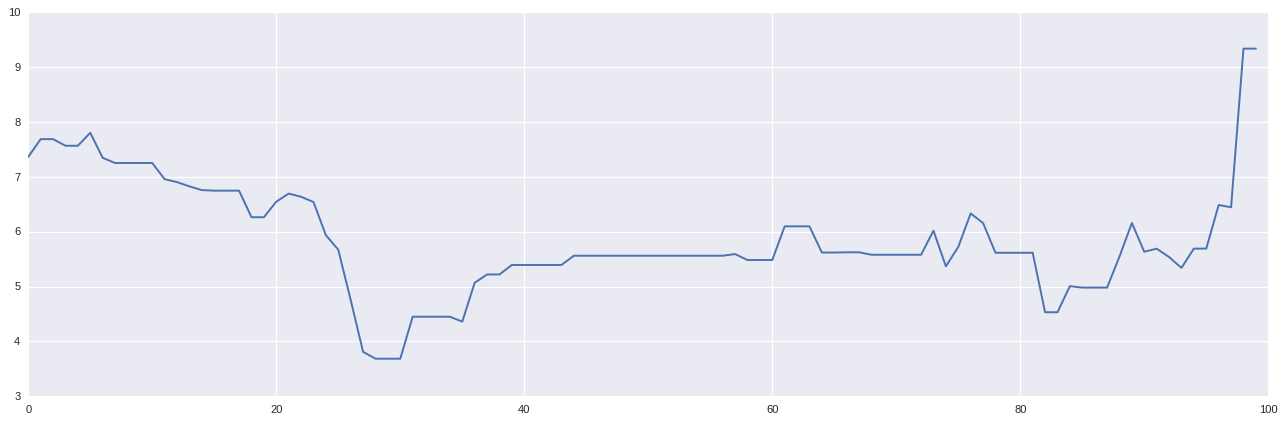

In [38]:
plt.plot(complete_chain[1,:,2])

In [36]:
complete_chain[1,:,1]

array([ -2.67548502,  -2.8830536 ,  -2.8830536 ,  -2.91670823,
        -2.91670823,  -2.88500114,  -2.9533834 ,  -2.83153191,
        -2.83153191,  -2.83153191,  -2.83153191,  -2.88043463,
        -2.99849394,  -3.88913363,  -4.66708054,  -4.41330463,
        -4.41330463,  -4.41330463,  -5.50662031,  -5.50662031,
        -4.48845872,  -5.60930096,  -5.23679589,  -4.27619591,
        -4.97651554,  -6.31770051,  -8.0601242 , -11.273849  ,
       -11.68258939, -11.68258939, -11.68258939,  -9.53894162,
        -9.53894162,  -9.53894162,  -9.53894162,  -9.76435401,
        -7.79162855,  -7.52789927,  -7.52789927, -10.42634142,
       -10.42634142, -10.42634142, -10.42634142, -10.42634142,
       -12.59999645, -12.59999645, -12.59999645, -12.59999645,
       -12.59999645, -12.59999645, -12.59999645, -12.59999645,
       -12.59999645, -12.59999645, -12.59999645, -12.59999645,
       -12.59999645, -12.36439503, -13.19646495, -13.19646495,
       -13.19646495,  -8.48848035,  -8.48848035,  -8.48

In [30]:
complete_chain <- info de cada cadena, cada iteracion y el parámetro transformado

array([[[  8.01398854,  -3.10187436,   6.08188774,  47.85399251],
        [  7.99353805,  -3.09816665,   6.07955393,  48.34796352],
        [  7.87271824,  -3.0153594 ,   6.24985606,  49.50196379],
        ..., 
        [  4.60799753,  22.7115909 ,   7.73505082,  50.77370795],
        [  2.58597072,  43.90031028,   7.8635586 ,  54.56721264],
        [  2.58645258,  43.91074155,   7.86449043,  54.55270599]],

       [[  7.24719106,  -2.67548502,   7.36463174,  51.8091328 ],
        [  7.31663724,  -2.8830536 ,   7.68637087,  44.54246792],
        [  7.31663724,  -2.8830536 ,   7.68637087,  44.54246792],
        ..., 
        [  7.88095625,  -8.47193462,   6.44426125,  66.03889454],
        [  7.99396391, -10.86311443,   9.33624159,  63.65218314],
        [  7.99396391, -10.86311443,   9.33624159,  63.65218314]],

       [[  7.08317042,  -3.35476981,   7.36804685,  56.95422154],
        [  7.08317042,  -3.35476981,   7.36804685,  56.95422154],
        [  7.08317042,  -3.35476981,   7.368

In [25]:
import matplotlib.pyplot as plt

In [27]:
jaja.shape

(10, 100)

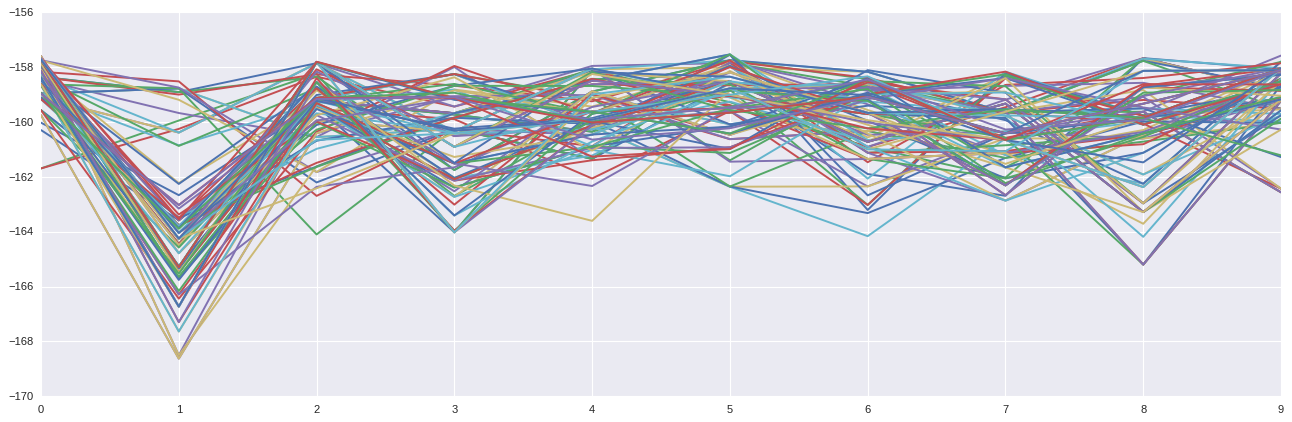

In [26]:
plt.plot(jaja)

## Convergence Diagnostics

In [21]:
g3.style_seaborn()
g3.plot_datatrace(datatrace)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

## Plot Marginals and reference parameters

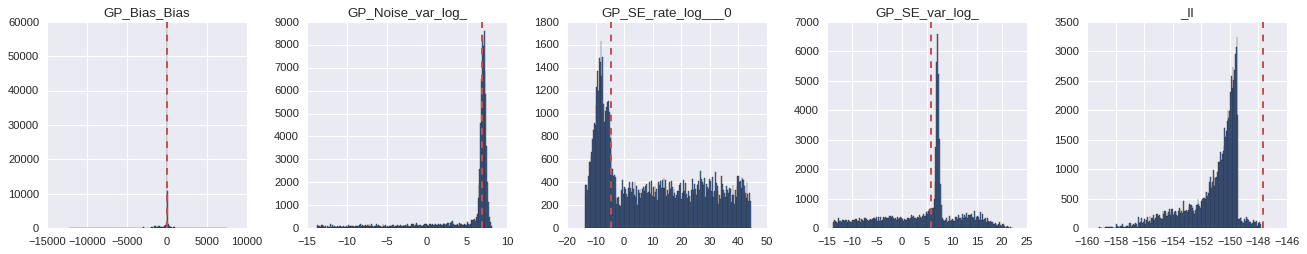

In [12]:
g3.hist_datatrace(datatrace, reference=gp.eval_params(params))

## Clustering of parameters and plot Bivariate distributions

In [13]:
g3.cluster_datatrace(gp, datatrace)

<function g3py.bayesian.average.cluster_datatrace.<locals>._cluster>

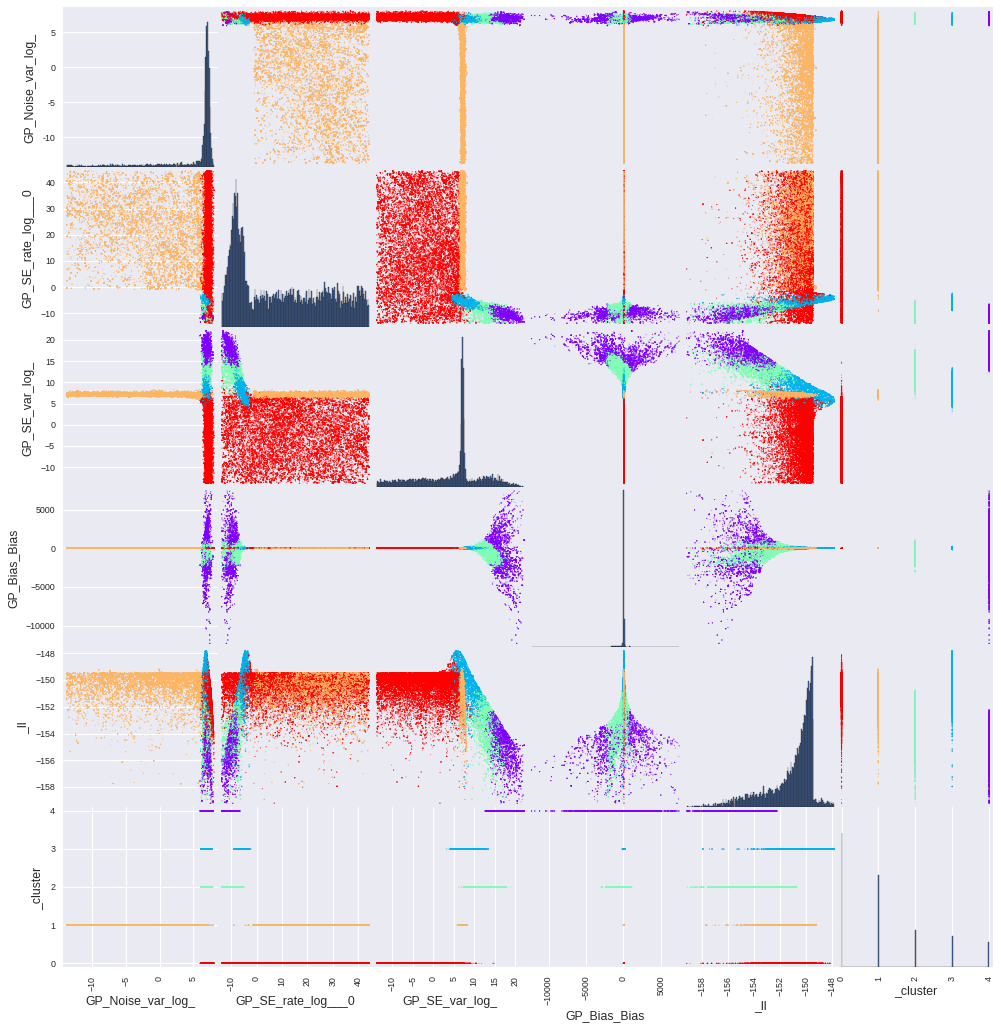

In [39]:
g3.scatter_datatrace(datatrace)

## Model Selection

In [22]:
candidates = g3.find_candidates(datatrace, ll=1, by_cluster=True)
candidates

GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  \
ll[327]            -5.808135           -0.450763        7.371746   
ll[37556]           6.783098           -0.603469        6.689780   
ll[81787]           2.522598            1.026919        7.287875   
ll[39151]           7.332922           13.411404      -10.110332   
ll[77153]           7.474529           -8.725853        5.029757   

           GP_Bias_Bias  _nchain  _niter  _burnin  _outlayer         _ll  \
ll[327]       54.216008        0     327    False      False -150.301483   
ll[37556]     59.311322        3    7556     True       True -151.879639   
ll[81787]     55.986819        8    1787     True       True -152.455719   
ll[39151]     55.873643        3    9151     True       True -152.498901   
ll[77153]     68.418191        7    7153     True       True -153.669235   

           _cluster  
ll[327]           3  
ll[37556]         1  
ll[81787]         0  
ll[39151]         2  
ll[77153]         4

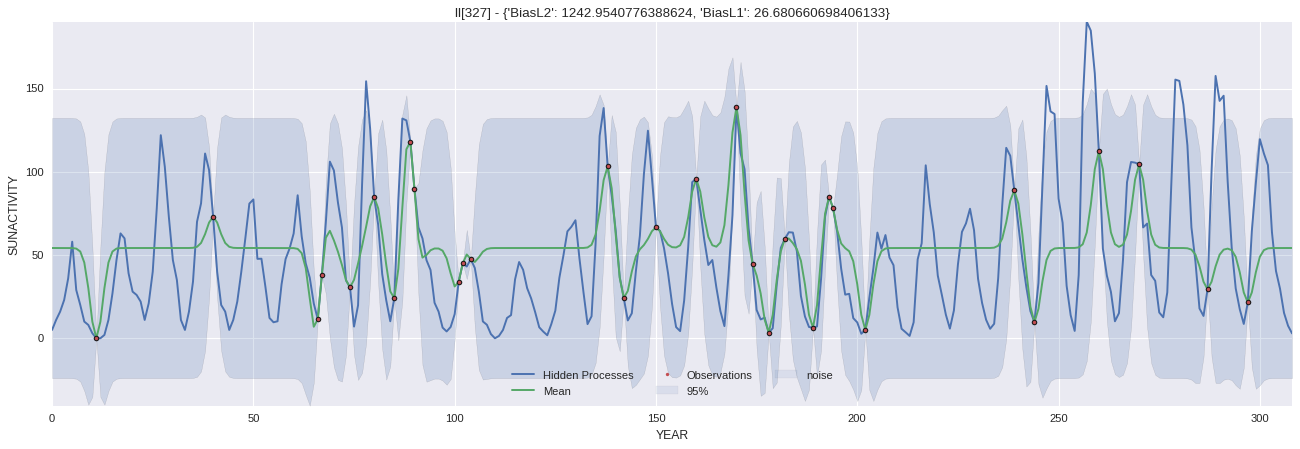

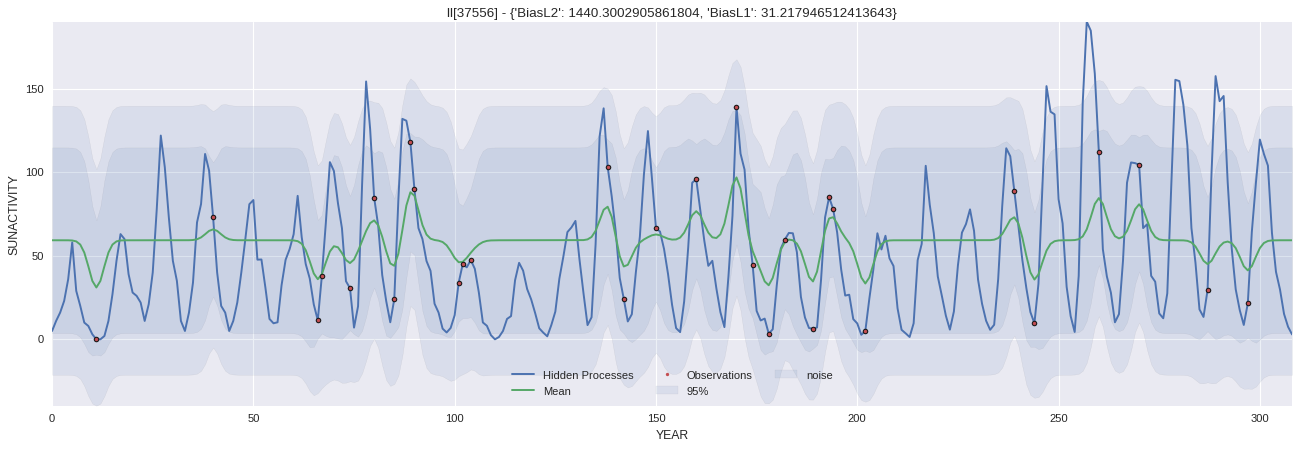

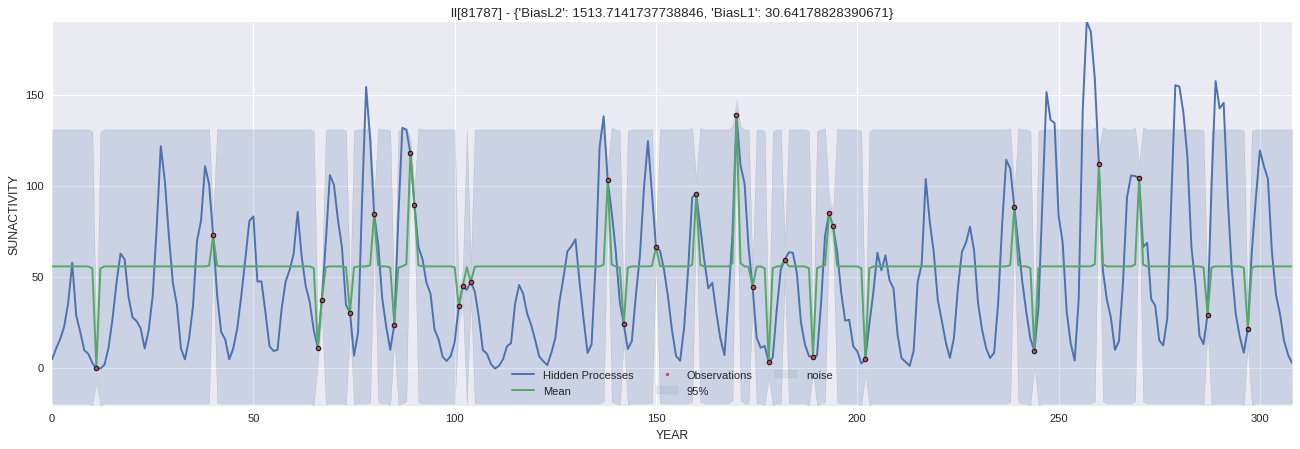

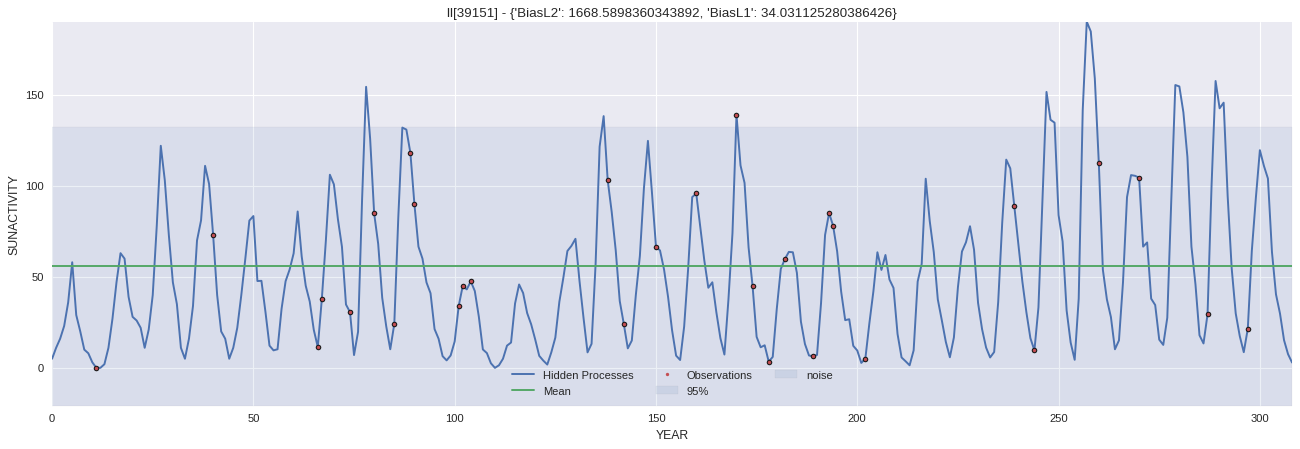

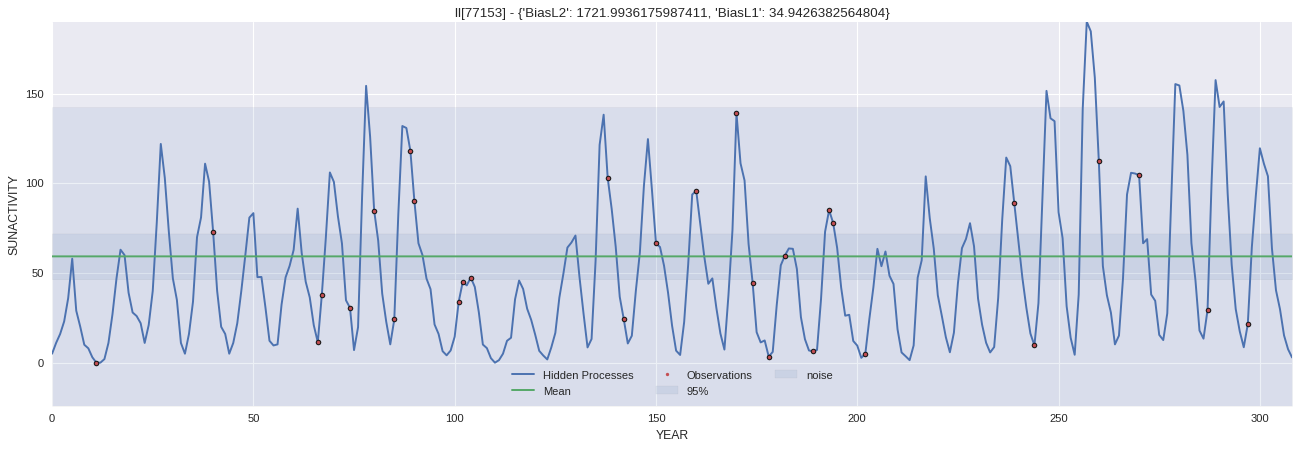

In [23]:
gp.plot_datatrace(candidates)

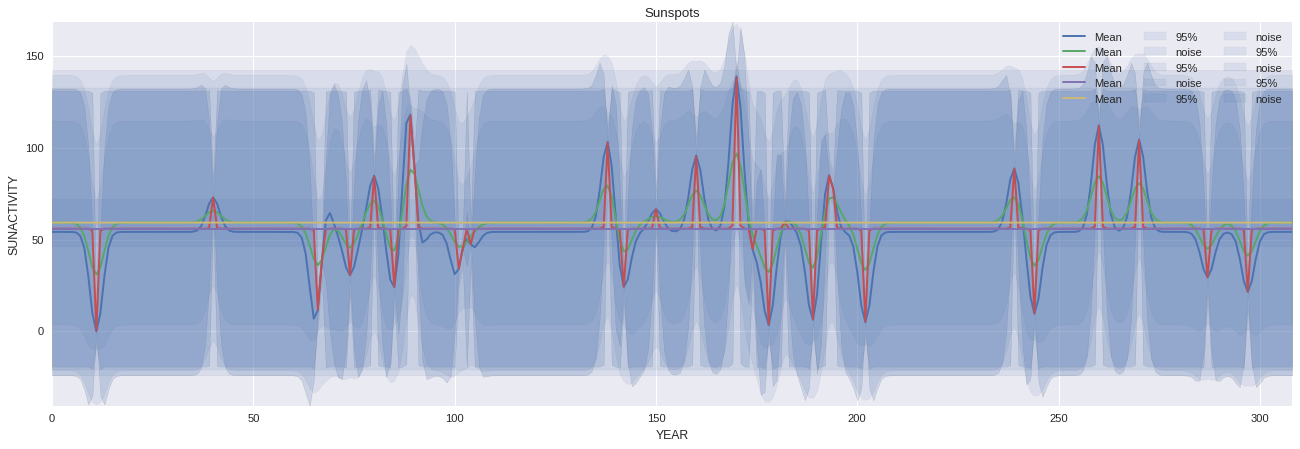

In [24]:
gp.plot_datatrace(candidates, overlap=True, limit=5, var=False, noise=False, samples=0, data=False, loc=True)

## Model Average

In [25]:
average = gp.average(candidates, quantiles=True, quantiles_noise=True)
average

{'BiasL1': 31.50283180631866,
 'BiasL2': 1517.5103991264116,
 'mean': array([ 56.93469238,  56.93469238,  56.93465424,  56.93426514,
         56.93045044,  56.90145111,  56.73238373,  55.99659348,
         53.71788788,  49.01132202,  42.98928452,  29.33412743,
         42.9892807 ,  49.01131058,  53.71787262,  55.9965744 ,
         56.73236084,  56.90142059,  56.93041229,  56.93422318,
         56.93460846,  56.93463898,  56.93463898,  56.93463135,
         56.93463135,  56.93463135,  56.93462372,  56.93462372,
         56.9346199 ,  56.9346199 ,  56.9346199 ,  56.93462372,
         56.93471527,  56.93564987,  56.94312286,  56.98914337,
         57.19985962,  57.8788681 ,  59.32017136,  61.19340134,
         65.37032318,  61.19340134,  59.32016754,  57.87886429,
         57.19985199,  56.98912811,  56.94310379,  56.9356308 ,
         56.93469238,  56.93460083,  56.9345932 ,  56.9345932 ,
         56.93458939,  56.93458939,  56.93458939,  56.93458939,
         56.93458939,  56.93456268,

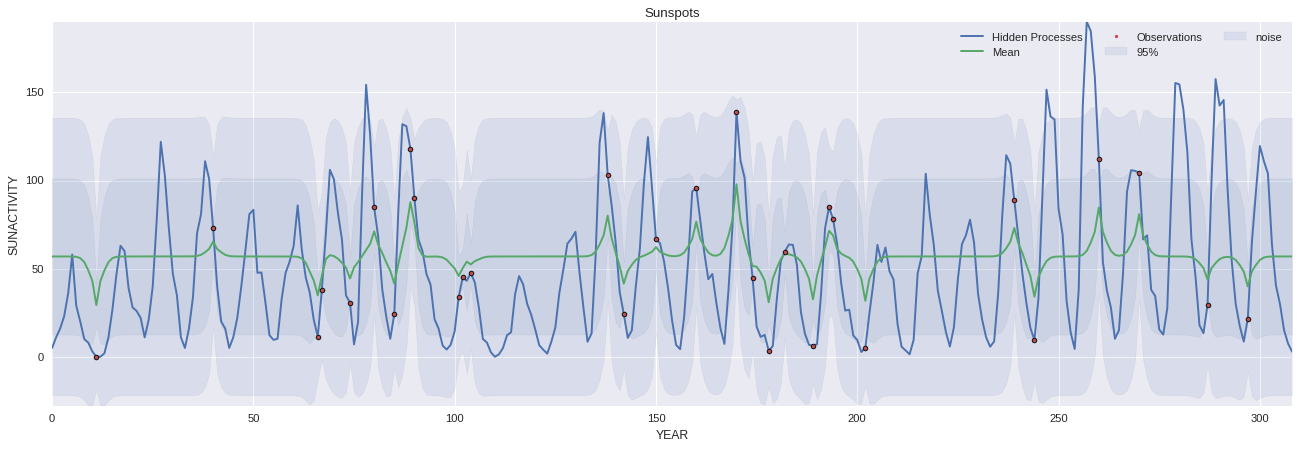

In [26]:
gp.plot(values=average)

## Sampling Particles

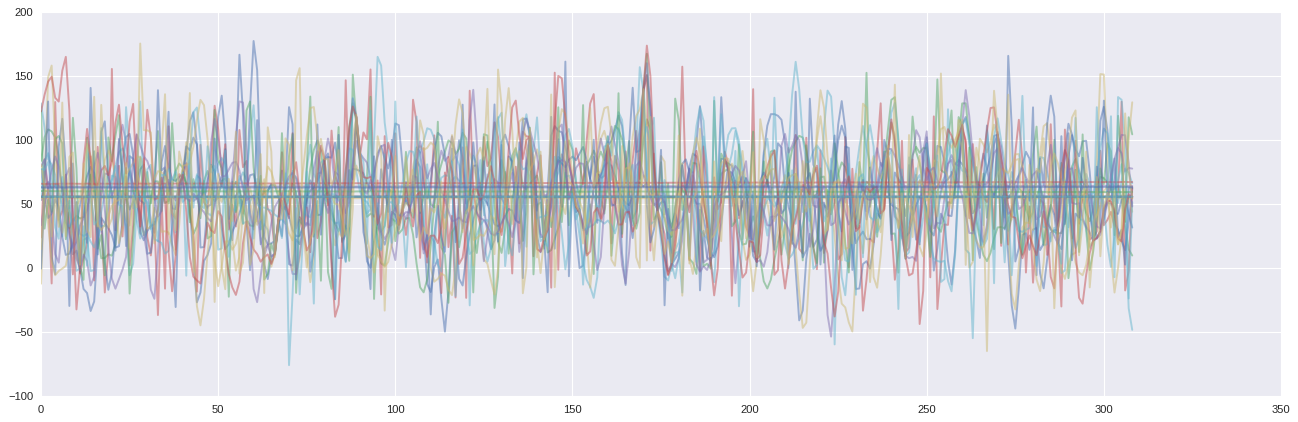

In [27]:
particles = gp.particles(candidates, nsamples=25)
g3.plot(particles, alpha=0.5)

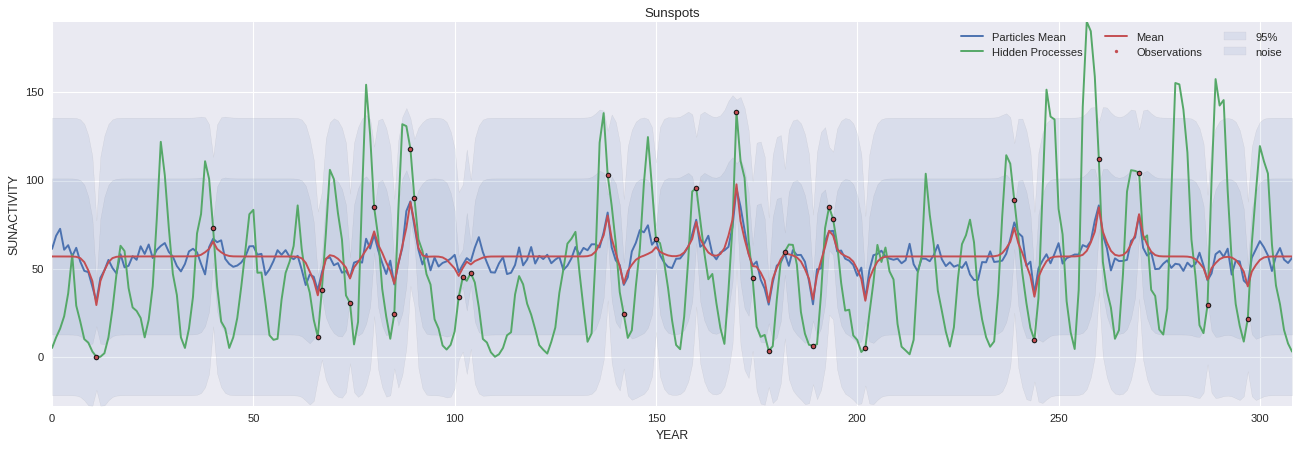

In [28]:
g3.plot(particles.mean(axis=1), label='Particles Mean')
gp.plot(values=average)

## Conditional and Marginal Datatrace as Empirical Distribution

#10000 (10.0 %)


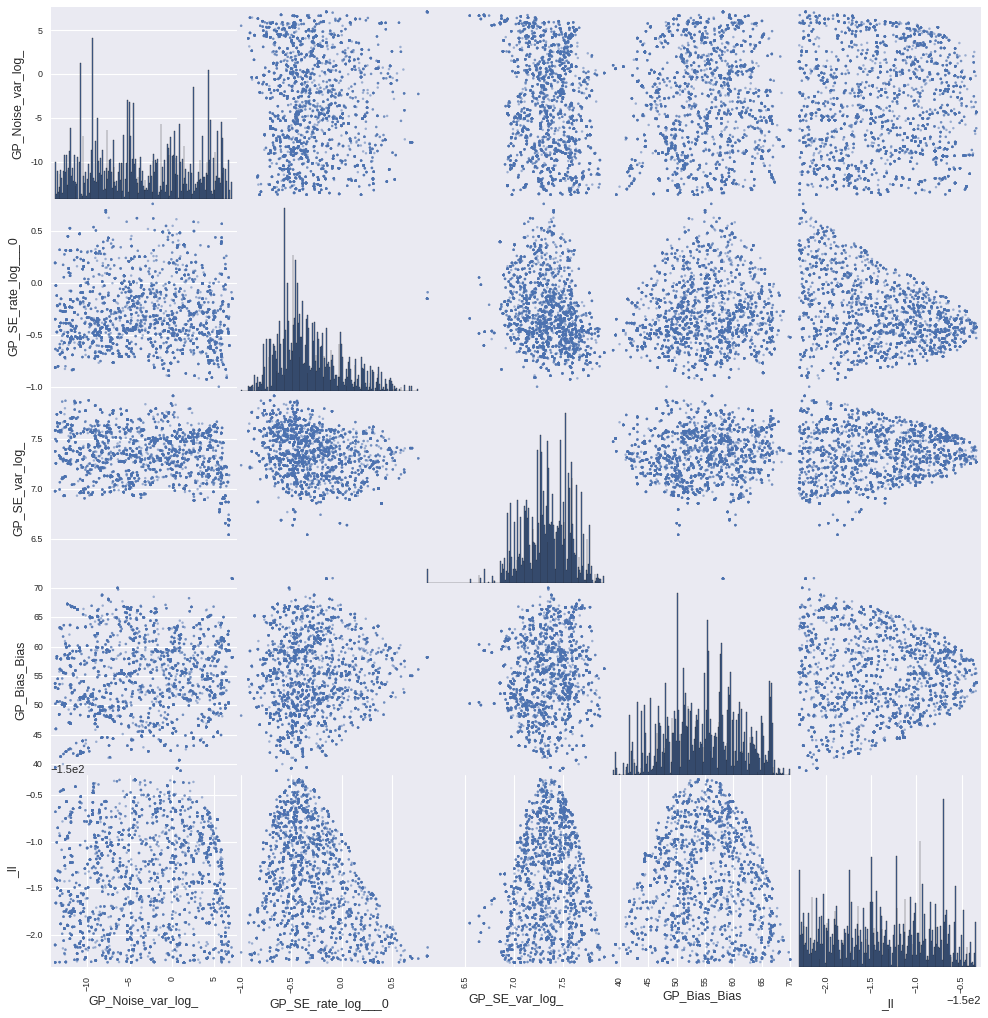

In [29]:
selected = g3.conditional_datatrace(datatrace, lambda df: df._ll > df._ll.quantile(0.9))
selected = g3.marginal_datatrace(selected, drop='_cluster')
g3.scatter_datatrace(selected)

## Kernel Density Estimation of Datatrace for sampling

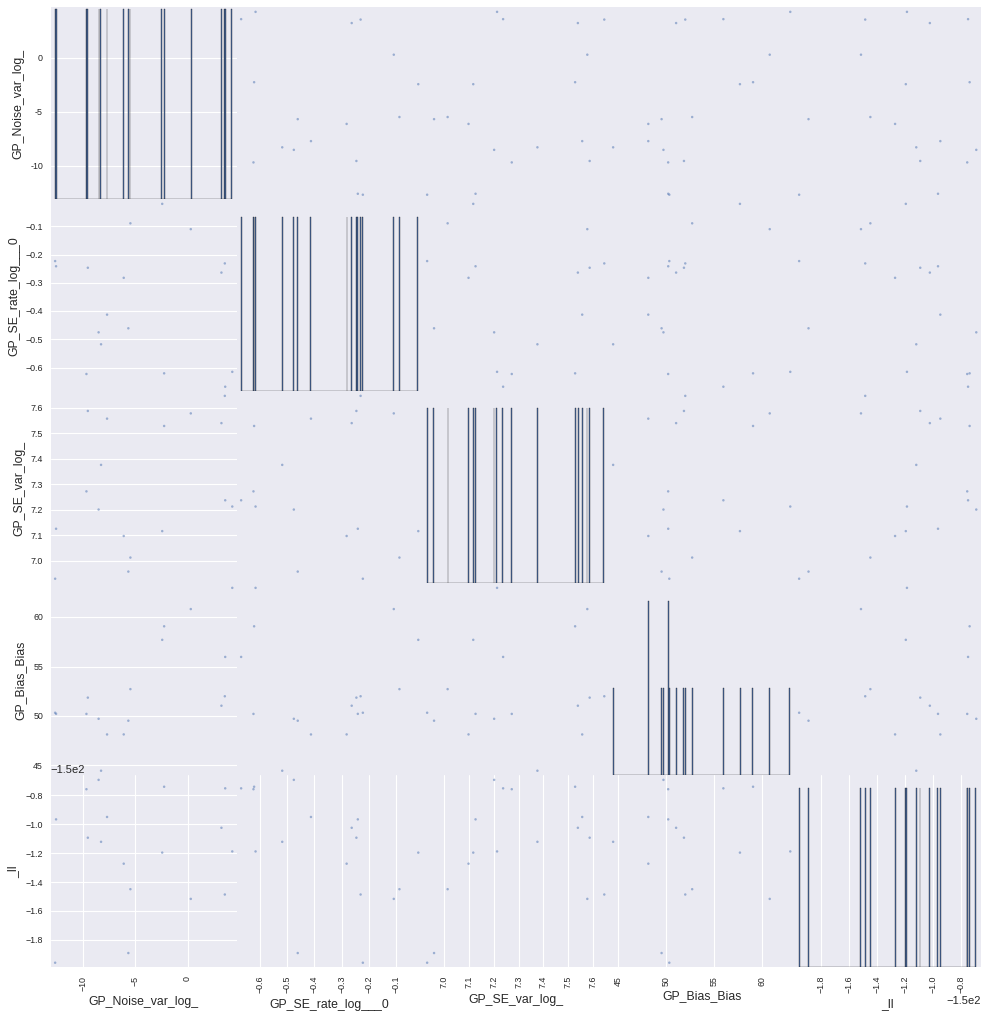

In [30]:
kde = g3.datatrace_to_kde(gp, selected)
models = g3.kde_to_datatrace(gp, kde, nsamples=25)
models = g3.marginal_datatrace(models, drop='_cluster')
g3.scatter_datatrace(models)

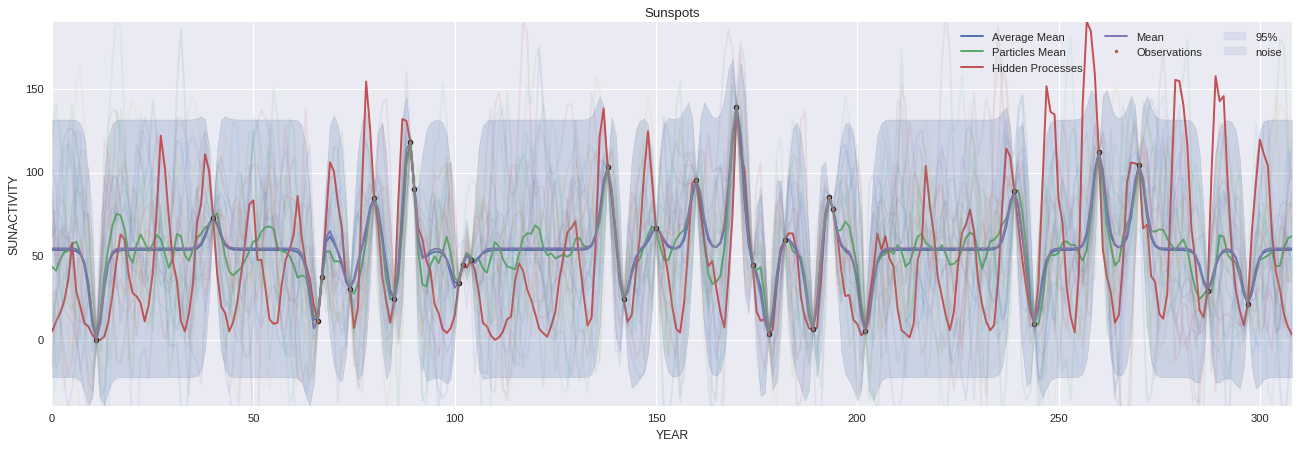

In [52]:
average = gp.average(models, quantiles=True, quantiles_noise=True)
particles = gp.particles(models)

g3.plot(average.mean, label='Average Mean')
g3.plot(particles.mean(axis=1), label='Particles Mean')
gp.plot(params_map)
g3.plot(particles, alpha=0.1)